classification of my data 


In [31]:
import pandas as pd
from sklearn.cluster import KMeans
from joblib import dump

# loading data
data = pd.read_csv('data.csv')

0       01
1       02
2       03
3       04
4       05
      ... 
96     971
97     972
98     973
99     974
100    976
Name: departements, Length: 101, dtype: object


In [3]:
#classify with KMeans 
X = data[['nombre_accident']]
model_classif_acc= KMeans(n_clusters=4, random_state=42)
model_classif_acc.fit(X)
model_classif_acc.predict(X)
#saving model 
dump(model_classif_acc, 'model_classif.joblib')


c:\anacmoh\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


['model_classif.joblib']

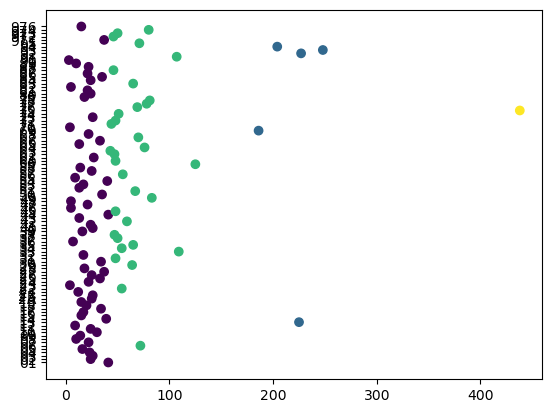

In [10]:
#diplay result with matplotlib 
import matplotlib.pyplot as plt
plt.scatter(data['nombre_accident'], data['departements'],c=model_classif_acc.predict(X))

In [40]:
# saving cluster for each departement 
cluster=model_classif_acc.predict(X)


[0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 2 0 2 2 2 0
 2 2 0 0 0 2 0 0 2 0 0 0 2 0 2 0 0 0 0 2 0 0 2 2 0 2 2 2 0 0 2 0 1 0 2 2 0
 2 3 2 2 2 0 0 0 0 2 0 0 0 2 0 0 0 2 1 1 1 2 0 2 2 2 0]


In [42]:
if len(cluster) == len(data):
    # Ajouter la liste comme nouvelle colonne dans le DataFrame
    data['clusters'] = cluster

In [46]:
print(data)
data.to_csv('data_classif.csv', index=False)
    #Cluster 0: Faible Fréquence d'Accdidents 
    #Cluster 1: Fréquence Élevée d'Accidents
    #Cluster 2: Fréquence  Modérée d'Accidents
    #Cluster 3: Fréquence Très Élevée d'Accidents 



    departements  nombre_accident  clusters
0             01               41         0
1             02               24         0
2             03               26         0
3             04               23         0
4             05               16         0
..           ...              ...       ...
96           971               37         0
97           972               46         2
98           973               50         2
99           974               80         2
100          976               15         0

[101 rows x 3 columns]


In [54]:
merged_data = pd.merge(df, dg, left_on='departements', right_on='Departement')

In [57]:
merged_data.to_csv('classif_geo.csv', index=False)